In [653]:
import torch
from torch import nn
#nnにはすべてのニューラルネットワークの基本的な構成要素が含まれている
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.5.1+cu124'

In [654]:
#何かデータを作る
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [655]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X))
print(len(X_train), len(X_test), len(y_train), len(y_test))

50
40 10 40 10


In [656]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='r', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=4, label='Predictions')

    plt.legend(prop={'size': 15})

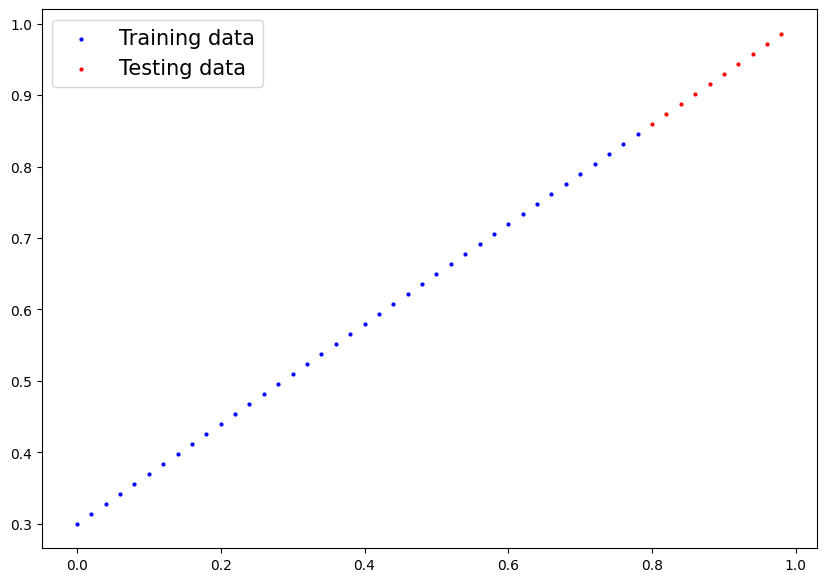

In [657]:
plot_predictions()

OOP=オブジェクト指向プログラミング \
Gradient descent : https://youtu.be/IHZwWFHWa-w \
Backpropagation : https://www.youtube.com/watch?v=Ilg3gGewQ5U \
Cheat Sheet : https://pytorch.org/tutorials/beginner/ptcheat.html

In [658]:
#モデルの作成
class LinearRegressionModel(nn.Module):#nn.ModuleはPyTorchのニューラルネットワークの基本クラス、これを継承してモデルを作る
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, #nn.Parameterはモデルのパラメータを定義するためのクラス
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        #↑モデルのパラメータを初期化する
        
        #nn.Moduleのサブクラスはforwardメソッドを実装する必要がある(上書き)
    def forward(self, x: torch.Tensor) -> torch.Tensor: #->は関数の戻り値の型を示す
        return self.weights * x + self.bias #線形回帰の式
        
        #最初はランダムな重みとバイアスを持つモデルを作成
        #forwardによって最適な重みとバイアスを見つける

In [659]:
#モデルのパラメータを見てみる

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [660]:
#パラメータの名前と値
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [661]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [662]:
with torch.inference_mode(): #inference_modeにすることで、勾配を計算しない→なくてもいいけど、大規模になったときにメモリを節約できる
    #torch.no_grad()でも同じだが、inference_modeの方がよいらしい
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

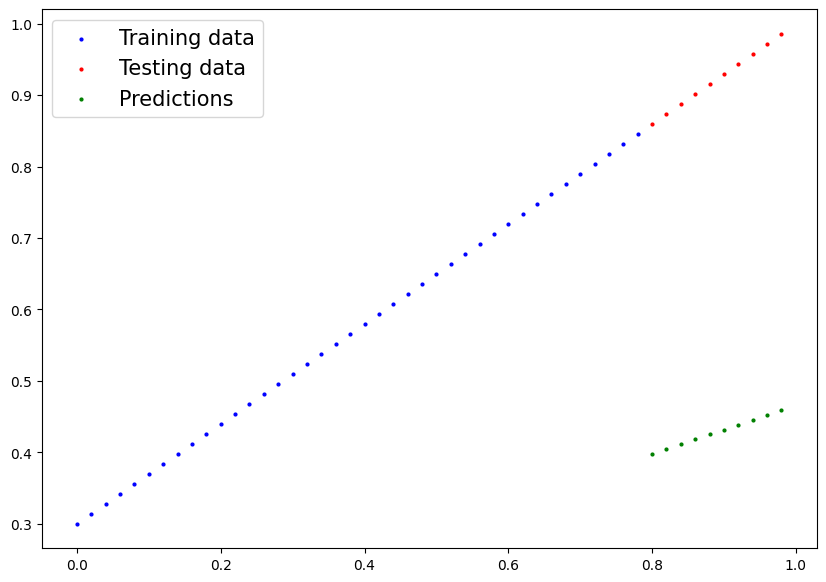

In [663]:
plot_predictions(predictions=y_preds)
#初期のモデルはランダムな重みとバイアスを持つため、データに適合していないことが分かる

In [664]:
#訓練する
#損失関数：モデルの予測と実際の値の差を計算する関数
#最適化アルゴリズム：モデルの重みとバイアスを更新するためのアルゴリズム。損失関数を最小化するようにする

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)#lrは非常に重要(パラメータの変化率)

In [665]:
#学習ループに必要な要素
#1.データ
#2.forward pass（予測）
#3.loss計算
#4.optimizer zero_grad（勾配の初期化）
#5.loss backward　（勾配の計算）
# 6.optimizer step (パラメータの更新)

In [666]:
epochs = 150

losses = []
epoch_list = []

for epoch in range(epochs):
    model_0.train() #モデルを訓練モードにする
    y_pred = model_0(X_train) #forward pass
    loss = loss_fn(y_pred, y_train) #loss計算
    losses.append(loss)
    epoch_list.append(epoch)
    if epoch % 5 == 0:
        print(f'Epoch {epoch} loss: {loss}')
    optimizer.zero_grad() #勾配の初期化 これをしないと勾配が蓄積されて正しい勾配が計算されない
    loss.backward() #勾配の計算
    optimizer.step() #パラメータの更新

Epoch 0 loss: 0.31288138031959534
Epoch 5 loss: 0.2552763521671295
Epoch 10 loss: 0.1976713240146637
Epoch 15 loss: 0.14006635546684265
Epoch 20 loss: 0.08908725529909134
Epoch 25 loss: 0.06395438313484192
Epoch 30 loss: 0.053148526698350906
Epoch 35 loss: 0.04819351062178612
Epoch 40 loss: 0.04543796554207802
Epoch 45 loss: 0.04343796148896217
Epoch 50 loss: 0.04167863354086876
Epoch 55 loss: 0.039933640509843826
Epoch 60 loss: 0.03818932920694351
Epoch 65 loss: 0.03647511452436447
Epoch 70 loss: 0.03476089984178543
Epoch 75 loss: 0.033043231815099716
Epoch 80 loss: 0.03132382780313492
Epoch 85 loss: 0.02960442565381527
Epoch 90 loss: 0.02788739837706089
Epoch 95 loss: 0.026173178106546402
Epoch 100 loss: 0.024458957836031914
Epoch 105 loss: 0.022739607840776443
Epoch 110 loss: 0.021020207554101944
Epoch 115 loss: 0.019300809130072594
Epoch 120 loss: 0.01758546568453312
Epoch 125 loss: 0.01587124727666378
Epoch 130 loss: 0.014155393466353416
Epoch 135 loss: 0.012435992248356342
Epoch 

Text(0, 0.5, 'Loss')

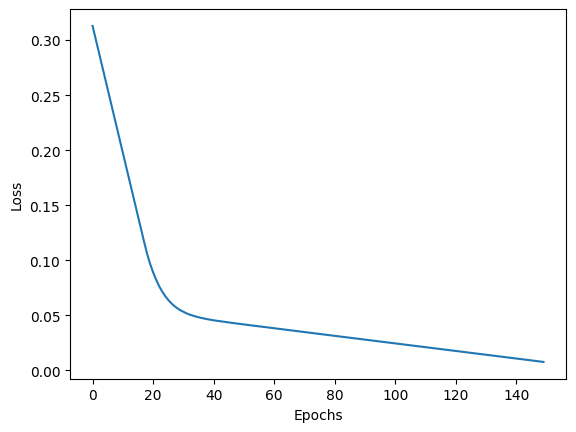

In [667]:
plt.plot(epoch_list, np.array(torch.tensor(losses).detach().numpy()), label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Test loss: 0.016889220103621483
ideal weight: 0.7 ideal bias: 0.3
after_training:  OrderedDict({'weights': tensor([0.6638]), 'bias': tensor([0.3153])})


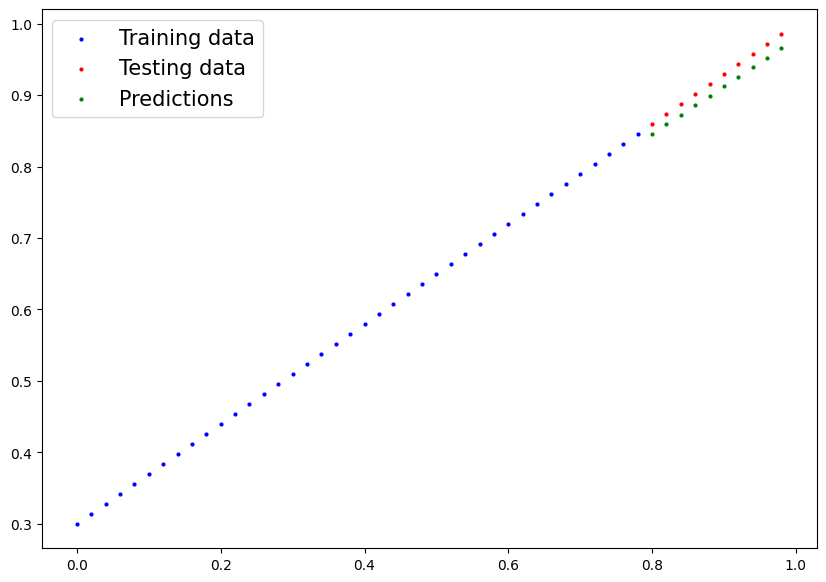

In [668]:
model_0.eval() #モデルを評価モードにする
with torch.inference_mode(): #inference_modeにすることで、勾配を計算しない→なくてもいいけど、大規模になったときにメモリを節約できる
    #torch.no_grad()でも同じだが、inference_modeの方がよいらしい
    y_preds = model_0(X_test)
    test_loss = loss_fn(y_preds, y_test)
    print(f'Test loss: {test_loss}')

y_preds

plot_predictions(predictions=y_preds)
print('ideal weight:', weight, 'ideal bias:', bias)
print('after_training: ', model_0.state_dict())

In [ ]:
#torch.save : pyrotchのオブジェクトをpickle形式で保存する
#torch.load : 保存されたpytorchのオブジェクトを読み込む
#torch.nn.Module.load_state_dict : モデルのパラメータを読み込む

torch.save(model_0.state_dict(), 'model_0.pth')
print('Model saved!')

Model saved!
